In [1]:
import sys
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, QuantileTransformer
from sklearn.metrics import mean_squared_error

sys.path.append('../Scripts')
from Data_Processing import DataProcessing

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = DataProcessing('../Data/train.csv')

In [3]:
df

,Lap_Number,Lap_Time,Lap_Improvement,S1,S1_Improvement,S2,S2_Improvement,S3,S3_Improvement,Kph,Driver_Name,Location,Event,Air_Temp,Track_Temp,Humidity,Pressure,Wind_Speed,Wind_Direction,Rain
0,1,92,0,28.600,0,35.427,0,43.313,0,4451.242136,SB,Location 2,Free Practice 2,2.776058,4.312772,60.00,1018.25,1.784040,175.0,-1.0
1,2,87,2,25.674,2,33.399,2,41.922,2,159392.402697,SB,Location 2,Free Practice 2,2.776058,4.324350,60.00,1018.25,2.060034,161.0,-1.0
2,3,73,0,28.129,0,34.091,0,57.248,0,104817.901338,SB,Location 2,Free Practice 2,2.776058,4.324350,60.00,1018.22,1.784040,148.0,-1.0
3,1,73,0,32.000,0,38.416,0,56.833,0,50188.525859,LGRA,Location 2,Free Practice 2,2.776058,4.301163,60.00,1018.12,1.456664,157.0,-1.0
4,2,73,0,28.013,0,36.743,0,44.716,0,130395.309083,LGRA,Location 2,Free Practice 2,2.779508,4.301163,60.00,1018.15,1.784040,149.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,17,84,0,22.936,0,21.231,0,23.701,0,174343.634724,PWEHRL,Location 8,Free Practice 1,3.425239,6.000000,38.47,1014.09,2.121320,171.0,0.0
10272,18,70,0,23.610,0,22.432,0,30.281,0,130102.351854,PWEHRL,Location 8,Free Practice 1,3.429461,6.008328,38.34,1014.13,1.000000,202.0,0.0
10273,19,70,0,17.200,0,22.681,0,24.308,0,14429.534254,PWEHRL,Location 8,Free Practice 1,3.435599,6.016644,38.30,1014.19,1.179407,203.0,0.0
10274,20,155,2,22.539,2,21.057,2,23.548,2,179270.312852,PWEHRL,Location 8,Free Practice 1,3.428488,6.016644,38.59,1014.16,1.593738,273.0,0.0


In [4]:
#df = df.loc[df['Lap_Time'] != 0]

y = df['Lap_Time']
X = df.drop(columns=['Lap_Time'])

obj_columns = list(X.select_dtypes(include=object).columns)

obj_columns.append('Lap_Improvement')
obj_columns.append('Lap_Number')
obj_columns.append('S1_Improvement')
obj_columns.append('S2_Improvement')
obj_columns.append('S3_Improvement')


num_columns = list(X.select_dtypes(include='number').columns)
num_columns.remove('Lap_Number')
num_columns.remove('Lap_Improvement')
num_columns.remove('S1_Improvement')
num_columns.remove('S2_Improvement')
num_columns.remove('S3_Improvement')


# Scalers

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
import joblib

In [6]:
#pt = PowerTransformer(method='yeo-johnson')
#X[num_columns] = pt.fit_transform(X[num_columns])
X

,Lap_Number,Lap_Improvement,S1,S1_Improvement,S2,S2_Improvement,S3,S3_Improvement,Kph,Driver_Name,Location,Event,Air_Temp,Track_Temp,Humidity,Pressure,Wind_Speed,Wind_Direction,Rain
0,1,0,28.600,0,35.427,0,43.313,0,4451.242136,SB,Location 2,Free Practice 2,2.776058,4.312772,60.00,1018.25,1.784040,175.0,-1.0
1,2,2,25.674,2,33.399,2,41.922,2,159392.402697,SB,Location 2,Free Practice 2,2.776058,4.324350,60.00,1018.25,2.060034,161.0,-1.0
2,3,0,28.129,0,34.091,0,57.248,0,104817.901338,SB,Location 2,Free Practice 2,2.776058,4.324350,60.00,1018.22,1.784040,148.0,-1.0
3,1,0,32.000,0,38.416,0,56.833,0,50188.525859,LGRA,Location 2,Free Practice 2,2.776058,4.301163,60.00,1018.12,1.456664,157.0,-1.0
4,2,0,28.013,0,36.743,0,44.716,0,130395.309083,LGRA,Location 2,Free Practice 2,2.779508,4.301163,60.00,1018.15,1.784040,149.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,17,0,22.936,0,21.231,0,23.701,0,174343.634724,PWEHRL,Location 8,Free Practice 1,3.425239,6.000000,38.47,1014.09,2.121320,171.0,0.0
10272,18,0,23.610,0,22.432,0,30.281,0,130102.351854,PWEHRL,Location 8,Free Practice 1,3.429461,6.008328,38.34,1014.13,1.000000,202.0,0.0
10273,19,0,17.200,0,22.681,0,24.308,0,14429.534254,PWEHRL,Location 8,Free Practice 1,3.435599,6.016644,38.30,1014.19,1.179407,203.0,0.0
10274,20,2,22.539,2,21.057,2,23.548,2,179270.312852,PWEHRL,Location 8,Free Practice 1,3.428488,6.016644,38.59,1014.16,1.593738,273.0,0.0


In [7]:
column_transformer = ColumnTransformer(
[('num', MinMaxScaler(), num_columns),
('obj', OneHotEncoder(drop='first'), obj_columns)],
remainder='passthrough')

trans_X = column_transformer.fit_transform(X)

In [8]:
joblib.dump(column_transformer, '../Models/Column_Transformer_NN.pkl')
#joblib.dump(pt, '../Models/Power_Transformer.pkl')

['../Models/Column_Transformer_NN.pkl']

In [9]:
#trans_X = trans_X.toarray()
y = np.asarray(y).astype(float)

In [10]:
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1,1))

joblib.dump(scaler, '../Models/NN_Y_Scaler.pkl')

['../Models/NN_Y_Scaler.pkl']

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(trans_X, y, random_state=42, test_size=0.1, shuffle=True)

In [13]:
X_train.shape

(9053, 89)

# Neural Network

In [14]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import backend as K
from keras.callbacks import EarlyStopping
from datetime import datetime
from tensorflow import keras
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import mean_squared_log_error

In [15]:
def root_mean_squared_log_error(y_true, y_pred):
        return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [16]:
mc = ModelCheckpoint(f'../Models/NN_model_test.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_dim=89),
    keras.layers.LeakyReLU(500),
    keras.layers.LeakyReLU(800),
    keras.layers.LeakyReLU(200),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='mean_squared_logarithmic_error',
              metrics=['mean_squared_logarithmic_error'])

In [18]:
history = model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=5000,
    validation_data=(X_test, y_test),
    callbacks=[mc, early_stopping],
    shuffle=True,
    steps_per_epoch=3
)

Epoch 1/5000
3/3 [==============================] - 1s 84ms/step - loss: 0.1899 - mean_squared_logarithmic_error: 0.1899 - val_loss: 0.1726 - val_mean_squared_logarithmic_error: 0.1726

Epoch 00001: val_loss improved from inf to 0.17265, saving model to ../Models\NN_model_test.h5
Epoch 2/5000
3/3 [==============================] - 0s 19ms/step - loss: 0.1988 - mean_squared_logarithmic_error: 0.1988 - val_loss: 0.1688 - val_mean_squared_logarithmic_error: 0.1688

Epoch 00002: val_loss improved from 0.17265 to 0.16877, saving model to ../Models\NN_model_test.h5
Epoch 3/5000
3/3 [==============================] - 0s 20ms/step - loss: 0.2250 - mean_squared_logarithmic_error: 0.2250 - val_loss: 0.1640 - val_mean_squared_logarithmic_error: 0.1640

Epoch 00003: val_loss improved from 0.16877 to 0.16404, saving model to ../Models\NN_model_test.h5
Epoch 4/5000
3/3 [==============================] - 0s 14ms/step - loss: 0.1556 - mean_squared_logarithmic_error: 0.1556 - val_loss: 0.1591 - val_mea

In [19]:
results = pd.DataFrame()
y_pred = scaler.inverse_transform(model.predict(X_test))
results['Predicted'] = ((1 / y_pred) - 1).ravel()
y_actual = scaler.inverse_transform(y_test)
results['Actual'] = ((1 / y_actual) - 1).ravel()

results['Predicted'] = y_pred
results['Actual'] = y_actual

results['Difference'] = abs(results['Predicted'] - results['Actual'])

In [20]:
scaler.inverse_transform(model.predict(X_test))

array([[101.46615],
       [100.5607 ],
       [ 99.46199],
       ...,
       [ 98.56881],
       [100.07079],
       [100.34199]], dtype=float32)

In [21]:
results

,Predicted,Actual,Difference
0,101.466148,87.0,14.466148
1,100.560699,70.0,30.560699
2,99.461990,68.0,31.461990
3,100.595367,113.0,12.404633
4,97.452461,130.0,32.547539
...,...,...,...
1001,101.497551,184.0,82.502449
1002,100.018547,72.0,28.018547
1003,98.568810,135.0,36.431190
1004,100.070793,68.0,32.070793


In [22]:
results['Difference'].mean()

19.261729177850377

In [23]:
mean_squared_error(results['Actual'], results['Predicted'], squared=False)

24.269091435238508

In [24]:
root_mean_squared_log_error(results['Actual'], results['Predicted'])

0.24081514996545053

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D915082E0>,
      dtype=object)

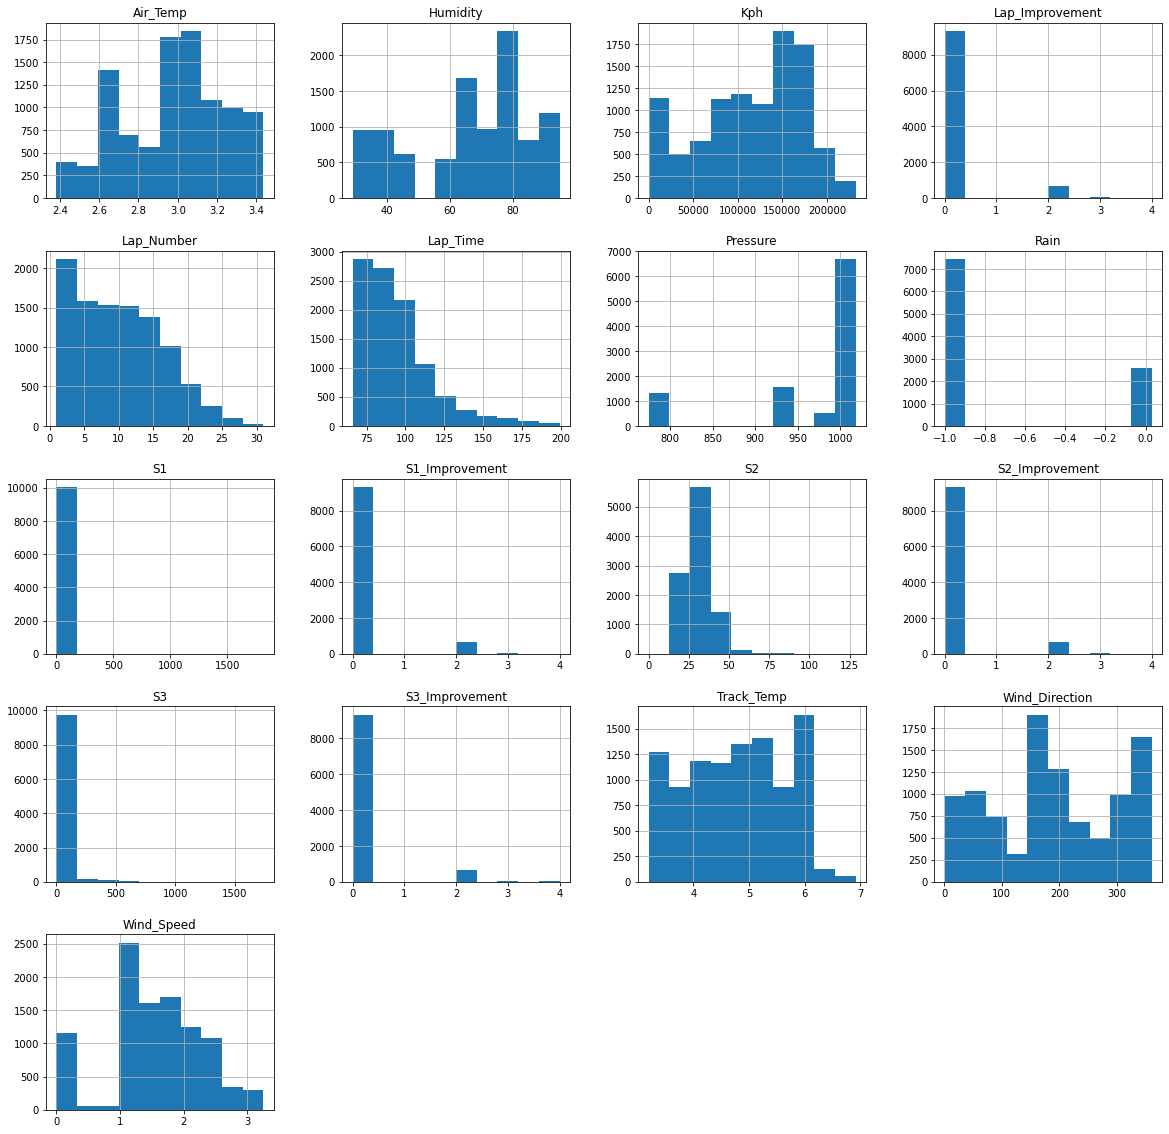

In [25]:
df.hist(figsize=(20,20))

In [26]:
df['Time_Minutes'].hist(bins=50, figsize=(10,10))

KeyError: 'Time_Minutes'

In [ ]:
df[df['S3'] < 1000].sort_values(by='S3', ascending=False)

In [ ]:
log_cols = [
    'Air_Temp',
    'Lap_Number',
    
    
]

root_cols = [
    'Elapsed',
    'Wind_Speed',
    'Track_Temp',
    
    
]

In [ ]:
df

In [ ]:
df